# Malaria Cell Classification with Convolution Neural Network using Keras

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import os

In [2]:
W = 32
H = 32

dataset = []
label = []
infected = os.listdir("../input/cell_images/cell_images/Parasitized")
uninfected = os.listdir("../input/cell_images/cell_images/Uninfected")


In [3]:
for i in infected:
    x = len(i)
    if i[x-3]=='p' and i[x-2]=='n' and i[x-1]=='g':
        try:
            image = cv2.imread("../input/cell_images/cell_images/Parasitized/"+i)
            image = cv2.resize(image,(W,H))
            dataset.append(image/255)
            label.append(1)
            #cv2.imshow('original',image)
            img = Image.fromarray(image)
            
            clockwise = np.array(img.rotate(-45))
            dataset.append(clockwise/255)
            label.append(1)
            #cv2.imshow('clockwise',clockwise)
            
            anticlockwise = np.array(img.rotate(+45))
            dataset.append(anticlockwise/255)
            label.append(1)
            #cv2.imshow('anticlockwise',anticlockwise)
        except AttributeError:
            print("error")


In [4]:
for i in uninfected:
    x = len(i)
    if i[x-3]=='p' and i[x-2]=='n' and i[x-1]=='g':
        try:
            image = cv2.imread("../input/cell_images/cell_images/Uninfected/"+i)
            image = cv2.resize(image,(W,H))
            dataset.append(image/255)
            label.append(0)
            #cv2.imshow('original',image)
            img = Image.fromarray(image)
            
            clockwise = np.array(img.rotate(-45))
            dataset.append(clockwise/255)
            label.append(0)
            #cv2.imshow('clockwise',clockwise)
            
            anticlockwise = np.array(img.rotate(+45))
            dataset.append(anticlockwise/255)
            label.append(0)
            #cv2.imshow('anticlockwise',anticlockwise)
        except AttributeError:
            print("error")

In [5]:

#Converting List to numpy array
X = np.asarray(dataset)
y = np.asarray(label)

In [6]:
#Splitting dataset into Train and Test sets
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size = 0.4)
print("Training samples = ",len(XTrain))
print("Testing samples = ",len(XTest))

Training samples =  49604
Testing samples =  33070


### Building CNN

In [7]:
#Importing ANN libraries
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [8]:
#Inializing CNN
classifier = Sequential()

#Adding 1st Convolution Layer
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(1,1),input_shape=(H,W,3), activation='relu'))
#Adding 1st MaxPooling Layer to reduce the size of Features
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#Adding Batch Normalization for Higher Learning Rate
classifier.add(BatchNormalization())
#Adding Dropout Layer to eliminate Overfitting
classifier.add(Dropout(0.2))

#Adding 2nd Convolution Layer
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), activation='relu'))
#Adding 2nd MaxPooling Layer
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#Adding Flatten Layer to convert 2D matrix into an array
classifier.add(Flatten())

#Adding 1st Fully Connected Layer
classifier.add(Dense(units=64, activation='relu'))
#Adding Fully Connected Output Layer
classifier.add(Dense(units=1, activation='sigmoid'))

print(classifier.summary())

### Compile and Fit the Model

In [9]:
#Compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Fitting the model
history = classifier.fit(XTrain, yTrain, batch_size=10, epochs=10)


Epoch 1/10
49604/49604 [==============================] - 35s 709us/step - loss: 0.2579 - acc: 0.8950
Epoch 2/10
49604/49604 [==============================] - 34s 681us/step - loss: 0.1568 - acc: 0.9478
Epoch 3/10
49604/49604 [==============================] - 34s 687us/step - loss: 0.1404 - acc: 0.9521
Epoch 4/10
49604/49604 [==============================] - 34s 688us/step - loss: 0.1328 - acc: 0.9544
Epoch 5/10
49604/49604 [==============================] - 34s 679us/step - loss: 0.1260 - acc: 0.9563
Epoch 6/10
49604/49604 [==============================] - 34s 688us/step - loss: 0.1205 - acc: 0.9586
Epoch 7/10
49604/49604 [==============================] - 34s 681us/step - loss: 0.1156 - acc: 0.9591
Epoch 8/10
49604/49604 [==============================] - 34s 680us/step - loss: 0.1115 - acc: 0.9608
Epoch 9/10
49604/49604 [==============================] - 34s 690us/step - loss: 0.1044 - acc: 0.9630
Epoch 10/10
49604/49604 [==============================] - 34s 680us/step - loss: 

<Figure size 432x288 with 0 Axes>

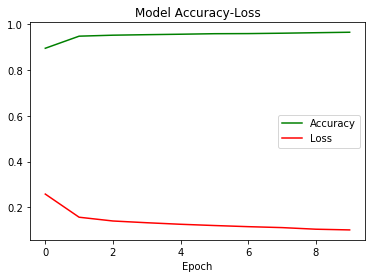

<Figure size 432x288 with 0 Axes>

In [10]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'],'green')
plt.plot(history.history['loss'],'red')
plt.title('Model Accuracy-Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'])
plt.figure()


### Predictions

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
#Predicting the Test set Results
yPred = classifier.predict(XTest)
yPred = (yPred>0.5) #Since output is probability
cm = confusion_matrix(yTest,yPred)
accuracy = accuracy_score(yTest,yPred)
print("Artificial Neural Network Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Artificial Neural Network Classifier :
Accuracy =  0.8091926217115211
[[10764  5690]
 [  620 15996]]


### Save the model

In [ ]:
classifier.save('Model.h5')